In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
stocks = ["MSFT", "AMZN", "COST", "XOM", "PFE", "ACN","LMT"]

end_date = pd.Timestamp.now().strftime('%Y-%m-%d')  
start_date = (pd.Timestamp.now() - pd.DateOffset(years=1)).strftime('%Y-%m-%d')  
prices = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
returns = prices.pct_change().dropna()


mean_returns = returns.mean()
cov_matrix = returns.cov()

risk_free_rate = 0.113/252


[*********************100%%**********************]  7 of 7 completed


In [4]:


def sharpe_ratio(weights):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return -(portfolio_return - risk_free_rate) / portfolio_std


constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(len(mean_returns)))

initial_weights = np.array([1/len(mean_returns)]*len(mean_returns))
optimized_result = minimize(sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

optimized_weights = optimized_result.x
optimized_weights, optimized_result.fun


(array([5.58004630e-02, 0.00000000e+00, 5.14832720e-01, 6.68192663e-02,
        3.62547551e-01, 2.69546213e-15, 0.00000000e+00]),
 -2.7603195935796374)

In [10]:
optimized_weights_percentage = np.round(np.array(optimized_weights) * 100, 2)
portfolio_weights_df = pd.DataFrame(data=optimized_weights_percentage, index=stocks, columns=['Weight'])
portfolio_weights_df


,Weight
MSFT,5.58
AMZN,0.00
COST,51.48
XOM,6.68
PFE,36.25
ACN,0.00
LMT,0.00


([<matplotlib.patches.Wedge at 0x2bb321b57f0>,
 [Text(1.0831381566866456, 0.19186384112035212, ''),
  Text(1.0330695754009898, 0.37784554037439566, ''),
  Text(-0.42561719717405705, 1.0143224346674484, ''),
  Text(-0.8731354500749386, -0.6690549198850826, ''),
  Text(0.4604121031309258, -0.9990098574541485, ''),
  Text(1.0999999999999852, 1.802315072267083e-07, ''),
  Text(1.0999999999999852, 1.802315072267083e-07, '')])

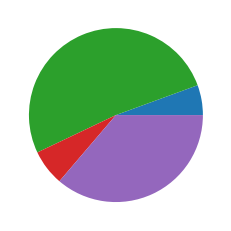

In [16]:
plt.pie(portfolio_weights_df["Weight"])